In [3]:
import pickle

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from src.definitions import ROOT_DIR

In [4]:
%load_ext autoreload
%autoreload 2

In [28]:
plt.style.use('seaborn-poster')

# Load training data

In [5]:
train_path = ROOT_DIR / 'data/external' / 'CSV_train.csv'

assert train_path.is_file()

In [6]:
data = pd.read_csv(train_path, sep=';')

In [7]:
data.sample(10)

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
54683,16/1-2,2850.172002,455221.34375,6533321.5,-2825.172119,ROTLIEGENDES GP.,Kupferschiefer Fm.,8.228645,5.495075,5.441825,...,279.067505,NaN,NaN,0.113874,1.078438,NaN,NaN,NaN,30000,2.0
244799,25/2-13 T4,3530.672000,469363.12500,6628699.5,-3504.945801,DUNLIN GP.,Drake Fm.,12.716498,5.193020,4.684497,...,NaN,NaN,4.216496,0.194282,NaN,NaN,NaN,NaN,65000,1.0
1147473,35/9-6 S,3574.080000,536942.62500,6804540.5,-3498.476563,DUNLIN GP.,Drake Fm.,8.563300,NaN,4.559417,...,NaN,NaN,NaN,-0.059018,NaN,2.142052,15.513804,NaN,30000,1.0
37463,15/9-17,696.781998,438591.46875,6478951.5,-674.765625,NORDLAND GP.,NaN,18.195631,NaN,1.408009,...,23.723104,NaN,NaN,0.008723,0.125818,NaN,NaN,NaN,65000,1.0
1030286,35/11-6,1761.791600,524994.06250,6784874.5,-1734.246826,ROGALAND GP.,Lista Fm.,18.466377,NaN,0.858953,...,NaN,NaN,NaN,0.000984,NaN,NaN,NaN,NaN,65000,1.0
174711,16/7-5,1246.295985,446273.81250,6468386.5,-1219.476440,HORDALAND GP.,Skade Fm.,14.526774,1.431286,1.449732,...,1.835072,NaN,NaN,NaN,1.138351,NaN,NaN,NaN,65000,1.0
905406,34/7-20,2188.726000,448296.28125,6812833.5,-2162.680908,SHETLAND GP.,Kyrre Fm.,12.769863,1.979221,1.384651,...,NaN,NaN,NaN,-0.009922,NaN,NaN,NaN,NaN,65000,1.0
108246,16/11-1 ST3,2312.201201,NaN,NaN,NaN,ZECHSTEIN GP.,Smith Bank Fm.,14.628952,2.224408,NaN,...,3.978006,NaN,NaN,-0.022495,1.401969,NaN,NaN,NaN,88000,1.0
159402,16/5-3,1963.318000,474406.34375,6510405.0,-1941.237793,HEGRE GP.,Skagerrak Fm.,8.586474,NaN,3.283908,...,13.636131,177.666885,NaN,-0.006981,NaN,3.589668,12.873349,NaN,30000,2.0
78586,16/10-2,3104.249202,443269.78125,6444990.0,-3076.909668,VESTLAND GP.,Skagerrak Fm.,8.289773,NaN,1.171078,...,NaN,NaN,-0.210227,0.026745,NaN,NaN,NaN,NaN,65030,2.0


In [9]:
data.shape

(1170511, 29)

## Raw features

In [8]:
data.columns

Index(['WELL', 'DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'GROUP', 'FORMATION',
       'CALI', 'RSHA', 'RMED', 'RDEP', 'RHOB', 'GR', 'SGR', 'NPHI', 'PEF',
       'DTC', 'SP', 'BS', 'ROP', 'DTS', 'DCAL', 'DRHO', 'MUDWEIGHT', 'RMIC',
       'ROPA', 'RXO', 'FORCE_2020_LITHOFACIES_LITHOLOGY',
       'FORCE_2020_LITHOFACIES_CONFIDENCE'],
      dtype='object')

## Wells

In [12]:
wells = len(data['WELL'].unique())

print(f'The number of wells is: {wells}')

The number of wells is: 98


## Target lithology

In [13]:
lithology_keys = {30000: 'Sandstone',
                  65030: 'Sandstone/Shale',
                  65000: 'Shale',
                  80000: 'Marl',
                  74000: 'Dolomite',
                  70000: 'Limestone',
                  70032: 'Chalk',
                  88000: 'Halite',
                  86000: 'Anhydrite',
                  99000: 'Tuff',
                  90000: 'Coal',
                  93000: 'Basement'}

In [15]:
data['FORCE_2020_LITHOFACIES_LITHOLOGY'].replace(lithology_keys, inplace=True)

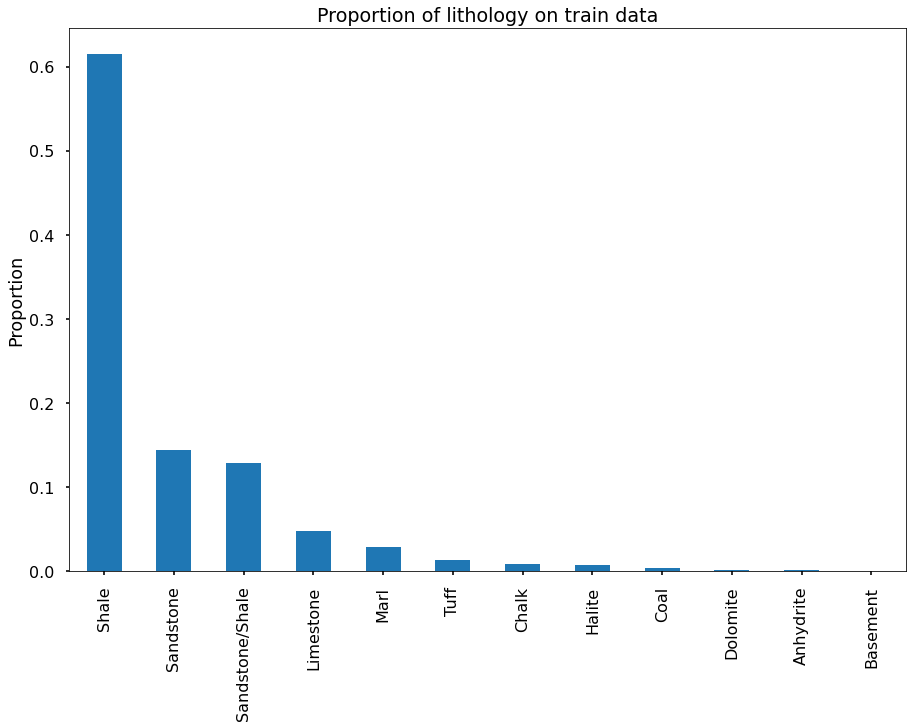

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

data['FORCE_2020_LITHOFACIES_LITHOLOGY'].value_counts(normalize=True).plot(kind='bar', ax=ax)

plt.title('Proportion of lithology on train data')
plt.ylabel('Proportion')

plt.show()

# Missing values

In [35]:
data['GR'].isnull().sum()

0

In [37]:
lith_logs = ['RHOB', 'DTC', 'PEF']

for well, group in data.groupby('WELL'):
    
    gr_samples = len(group['GR'])
    
    
    print(f'Well: {well}')
    for log in lith_logs:
        log_samples = group[log].isnull().sum()
        
        proportion = log_samples / gr_samples
        
        print(f'{log}: Proportion to GR: {proportion:.2f}')
        
    print('#################')
    print('')

Well: 15/9-13
RHOB: Proportion to GR: 0.00
DTC: Proportion to GR: 0.00
PEF: Proportion to GR: 0.10
#################

Well: 15/9-15
RHOB: Proportion to GR: 0.01
DTC: Proportion to GR: 0.00
PEF: Proportion to GR: 0.00
#################

Well: 15/9-17
RHOB: Proportion to GR: 0.04
DTC: Proportion to GR: 0.00
PEF: Proportion to GR: 0.04
#################

Well: 16/1-2
RHOB: Proportion to GR: 0.05
DTC: Proportion to GR: 0.00
PEF: Proportion to GR: 1.00
#################

Well: 16/1-6 A
RHOB: Proportion to GR: 0.04
DTC: Proportion to GR: 0.04
PEF: Proportion to GR: 0.04
#################

Well: 16/10-1
RHOB: Proportion to GR: 0.36
DTC: Proportion to GR: 0.00
PEF: Proportion to GR: 0.35
#################

Well: 16/10-2
RHOB: Proportion to GR: 0.00
DTC: Proportion to GR: 0.00
PEF: Proportion to GR: 0.00
#################

Well: 16/10-3
RHOB: Proportion to GR: 0.34
DTC: Proportion to GR: 0.00
PEF: Proportion to GR: 0.37
#################

Well: 16/10-5
RHOB: Proportion to GR: 0.06
DTC: Proporti